In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
# --- Theme Configuration ---
# Feel free to experiment with these colors!
BACKGROUND_COLOR = '#2c3e50'  # Dark slate blue
AXES_FACE_COLOR = '#34495e'   # Slightly lighter slate blue
TEXT_COLOR = '#ecf0f1'       # Light silver/off-white
ACCENT_COLOR_1 = '#e74c3c'     # Bright red
ACCENT_COLOR_2 = '#3498db'     # Bright blue
ACCENT_COLOR_3 = '#f1c40f'     # Bright yellow
GRID_COLOR = '#7f8c8d'       # Muted gray for grid
SPINE_COLOR = '#95a5a6'      # Slightly lighter gray for spines
LEGEND_FACE_COLOR = '#34495e'
LEGEND_EDGE_COLOR = '#ecf0f1'

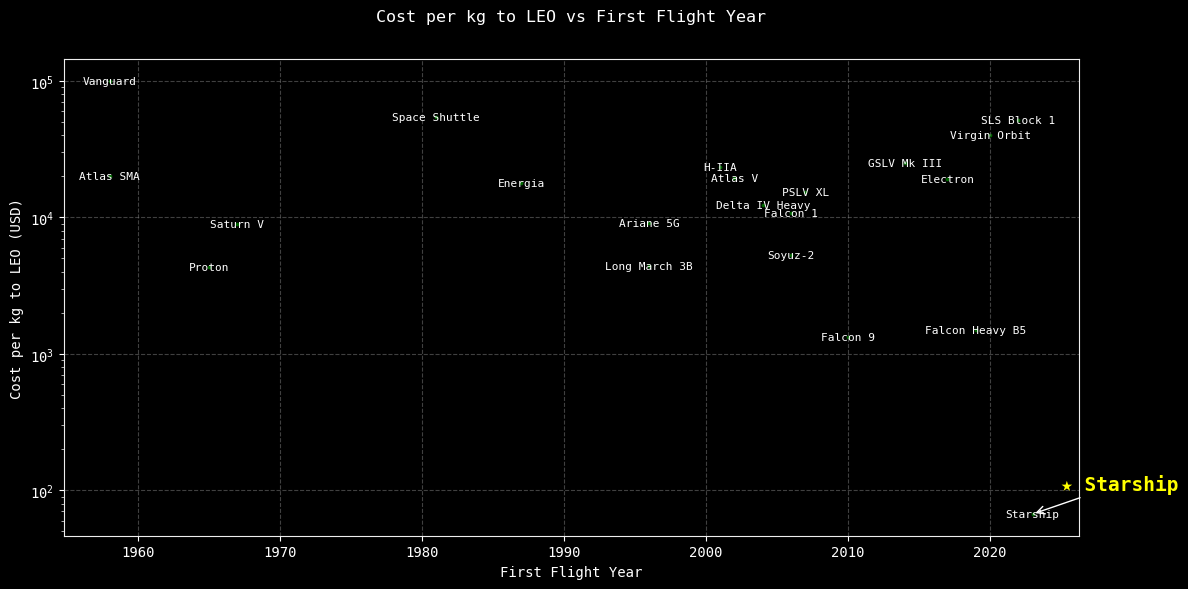

In [16]:
import matplotlib.pyplot as plt

# Data without N1, constant bubble size
rockets = [
    "Vanguard", "Atlas SMA", "Saturn V", "Space Shuttle", "Energia",
    "Proton", "Soyuz-2", "Falcon 1", "Delta IV Heavy", "Atlas V", "Ariane 5G",
    "Long March 3B", "PSLV XL", "H-IIA", "GSLV Mk III", "Electron", 
    "Virgin Orbit", "Falcon 9", "Falcon Heavy B5", "SLS Block 1", "Starship"
]

first_flight = [
    1958, 1958, 1967, 1981, 1987,
    1965, 2006, 2006, 2004, 2002, 1996,
    1996, 2007, 2001, 2014, 2017, 2020,
    2010, 2019, 2022, 2023
]

cost_per_kg = [
    100000, 20000, 8900, 54500, 18000,
    4320, 5333, 10754, 12340, 19500, 9167,
    4412, 15450, 23500, 25000, 19039, 40000,
    1320, 1500, 52100, 67
]

# Create bubble chart with constant size
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

constant_size = 3  # constant bubble size for all

ax.scatter(first_flight, cost_per_kg, s=constant_size, color='green', alpha=0.7)

# Centered annotations
for x, y, label in zip(first_flight, cost_per_kg, rockets):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='white')

# Styling
ax.set_xlabel("First Flight Year", color='white')
ax.set_ylabel("Cost per kg to LEO (USD)", color='white')
ax.set_title("Cost per kg to LEO vs First Flight Year\n", color='white')
ax.set_yscale('log')
ax.grid(True, color='gray', linestyle='--', alpha=0.5)
ax.tick_params(colors='white')

# Highlight "Starship" label
starship_idx = rockets.index("Starship")
x_starship = first_flight[starship_idx]
y_starship = cost_per_kg[starship_idx]

ax.annotate(
    "★ Starship",
    xy=(x_starship, y_starship),
    xytext=(x_starship+2, y_starship*1.5),
    color='yellow',
    fontsize=14,
    fontweight='bold',
    arrowprops=dict(facecolor='yellow', arrowstyle='->'),
    ha='left'
)


plt.tight_layout()
plt.show()


In [3]:

# performance = { 'Rocket': [wet mass (kg), dry mass (kg), vacuum Isp (s)] }
performance = {
    # [wet_mass_kg, dry_mass_kg, Isp_s, LEO_payload_kg]
    'Atlas V 551':              [23077, 2247, 449.7,   18850],
    'Falcon 9 expended':        [111500, 4000, 348,    22800],   # fully‑fuelled second stage
    'Falcon Heavy expended':    [111500, 4000, 348,    63800],
    'Delta IV Heavy':           [30700,  3480, 465.5,  28790],
    'SLS Block 1B':             [143000,  14000, 460, 105000],
    'Starship refuelled in LEO':[1300000,120000,380,  1450000],
    'Starship refuelled in HEO':[1300000,120000,380,  1450000],
    'Stripped Starship refuelled in HEO':[1300000,80000,380,  1450000],
}
#all assume starting in orbit with periapsis of 200km, but have some DV penalty/bonus from use of upper stage to reach LEO/HEO Starship & SLS bonus

    




Need to calculate the payload mass of various rockets as a function of C3. C3 is the energy given as:
$$
\frac{C_3}{2}=\frac{v^2}{2}-\frac{\mu}{r}
$$
This is only positive for objects on escape velocity trajectories. Once we know the DV of the spacecraft, it is easy to calculate this number numerically starting from HEO (eg SLS or Starship) or analytically from LEO (even easier). The issue is that for all vehicles that do not utilize in orbit refuelling, the LEO/HEO DV is a function of payload mass, and this is not publically avaliable info. We can make a first pass assuming that the second stage reaches orbit with propellant roughly equal to the vehicles max LEO payload minus the actual payload mass. 

<!-- We can make a first pass assuming constant DV to reach orbit (not a terrible assumption since all listed vehicles have reasonably high TWR, so gravity losses are reduced) -->

The only major problem is SLS as LEO payload > 2nd stage prop mass for block 1. I suppose I could just do B1B. 


In [4]:
#Light DV calc
isp = 380.5 #348 mvac, 380 rvac, 421 j2, 450.5 Rl10
payload = 122000
dry_mass = 122050#dry mass of upper stage not including payload
max_payload_leo = 1500000
dv = 9.81*isp*np.log((max_payload_leo+dry_mass)/(payload+dry_mass))
print(f"{dv}m/s")


7070.015526065858m/s


(0.0, 120000.0)

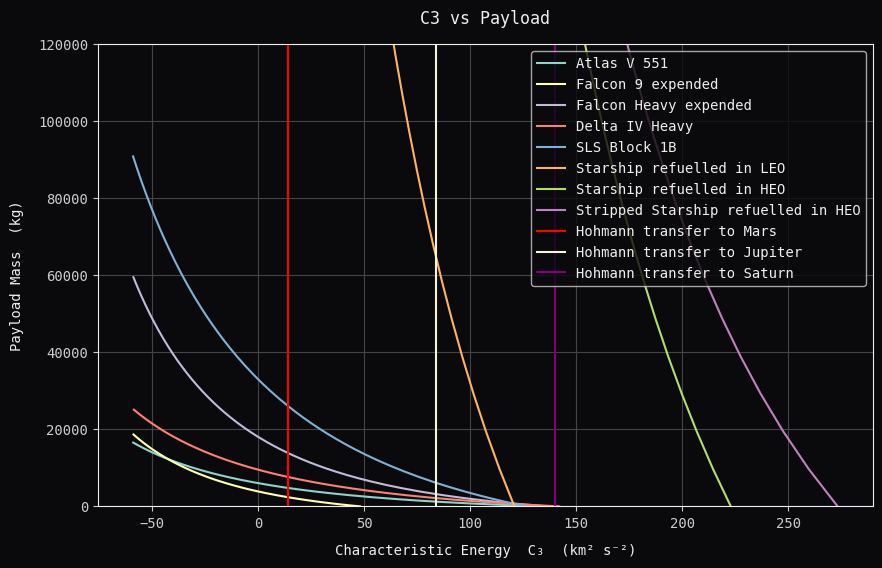

In [6]:
g0 = 9.80665  # m/s^2
v_leo = 7780  # m/s (circular velocity at ~200 km)
v_escape = 10930  # m/s (escape velocity at same altitude)

fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('dark_background') # Start with a dark base

# ----------  Retro‑Sci‑Fi Matplotlib Theme  ----------
plt.rcParams.update({
    'figure.facecolor': '#0A0A0C',
    'axes.facecolor':   '#0A0A0C',
    'axes.edgecolor':   '#EEEEEE',
    'axes.labelcolor':  '#EEEEEE',
    'text.color':       '#EEEEEE',
    'xtick.color':      '#CCCCCC',
    'ytick.color':      '#CCCCCC',
    'grid.color':       '#444444',
    'font.family':      'monospace',
    'axes.titlepad':    15,
})

for lv, (wet_mass, dry_mass, isp, leo_cap) in performance.items():
    prop_capacity = wet_mass - dry_mass
    # sample 150 points between a small payload (1 kg) and the LEO capability
    payloads = np.linspace(1, leo_cap, 150)
    c3_vals = []
    valid_payloads = []
    for p in payloads:
        available_prop = leo_cap - p - dry_mass
        # cap by tank capacity and ignore negative available propellant
        if available_prop <= 0:
            continue
        available_prop = min(available_prop, prop_capacity)
        delta_v = 0.87*isp * g0 * np.log((available_prop+dry_mass+p)/ (dry_mass + p))
        if lv == 'Starship refuelled in HEO' or lv == 'Stripped Starship refuelled in HEO':
            delta_v += 3000
        c3 = (v_leo + delta_v)**2 - v_escape**2  # m^2/s^2
        c3_vals.append(c3 / 1e6)  # convert to km^2/s^2
        valid_payloads.append(p)
    if c3_vals:
        ax.plot(c3_vals, valid_payloads, label=lv)



# Axis labels and title with retro flavour
ax.set_xlabel('Characteristic Energy  C₃  (km² s⁻²)', labelpad=10)
ax.set_ylabel('Payload Mass  (kg)', labelpad=10)
plt.title('C3 vs Payload')
ax.grid(True)
#ax.tight_layout()
plt.axvline(x = 14, color = 'red', label = 'Hohmann transfer to Mars')
plt.axvline(x = 84, color = 'beige', label = 'Hohmann transfer to Jupiter')
plt.axvline(x = 140, color = 'purple', label = 'Hohmann transfer to Saturn')
ax.legend(loc='upper right')

plt.ylim(top = 120000,bottom = 0)
# plt.show()

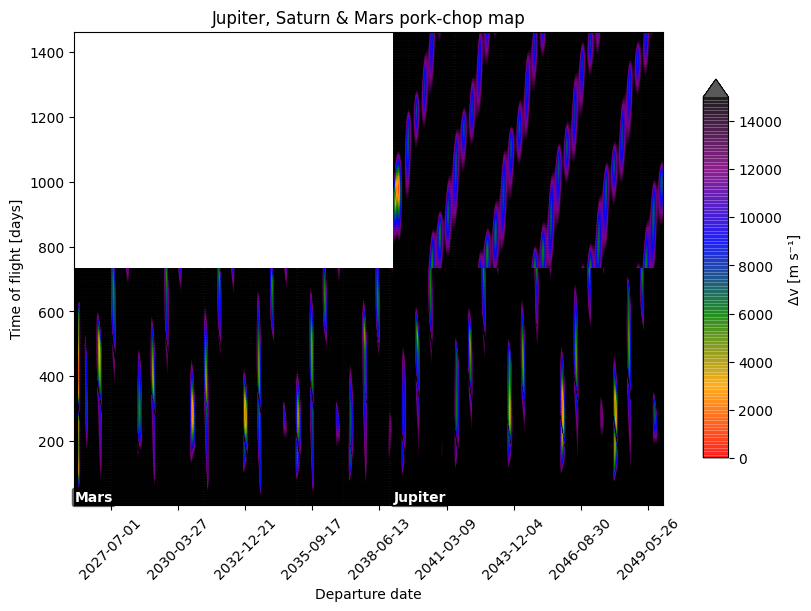

In [14]:
#!/usr/bin/env python3
"""
porkchop_real_layout.py
-----------------------

Works with “index-mapped” CSVs:

    • <target>_dvs.csv     – R×C grid of Δv values
    • <target>_dates.csv   – (R*C)×2 list of Launch,Arrival dates
                             in *row-major* order for that grid

Update `DATA_DIR` and `PAIRS` to suit your filenames.
"""

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors

# ----------------------------------------------------------------------
DATA_DIR = Path("")       # ← ←  set this folder
PAIRS = [
    ("Jupiter", "jupiter_dvs.csv",  "jupiter_dates.csv"),
    # ("Saturn",  "saturn_dvs.csv",   "saturn_dates.csv"),
    ("Mars",    "mars_dvs.csv",     "mars_dates.csv"),
]
# ----------------------------------------------------------------------

# fig, axes = plt.subplots(
#     nrows=1,
#     ncols=len(PAIRS),
#     figsize=(6 * len(PAIRS), 5),
#     sharey=True,
#     constrained_layout=True
# )
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
for label, dv_file, date_file in PAIRS:
    # ... read dv, launch_vec, tof_vec exactly as before ...
    # ---------- 1. Δv grid ----------
    dv = pd.read_csv(DATA_DIR / dv_file, header=None).to_numpy(dtype=float)
    R, C = dv.shape

    # ---------- 2. launch / arrival lists ----------
    dates = pd.read_csv(
        DATA_DIR / date_file,
        parse_dates=["Launch Date", "Arrival Date"]
    )
    if len(dates) != R * C:
        raise ValueError(
            f"{label}: date list length ≠ Δv grid size "
            f"({len(dates)} vs {R}×{C}={R*C})"
        )

    # reshape to match Δv grid
    launch_grid  = dates["Launch Date"].to_numpy().reshape(R, C)
    tof_grid_day = (
        (dates["Arrival Date"] - dates["Launch Date"])
        .dt.total_seconds()
        .to_numpy()
        .reshape(R, C) / 86400.0
    )

    # ---------- 3. derive unique axes ----------
    launch_vec = launch_grid[:, 0]     # one launch date per row
    tof_vec    = tof_grid_day[0, :]    # one TOF per column
    X, Y = np.meshgrid(
        mdates.date2num(launch_vec),
        tof_vec,
        indexing="ij"
    )

    pcm = ax.pcolormesh(
        X, Y, dv,
        shading="auto",
        cmap=cmap,          # same shared cmap / norm from the previous step
        norm=norm,
        alpha=0.65          # <— 40 % transparent so layers show through
    )

    # Add a text label INSIDE the field so the legend is obvious
    # Here we drop it roughly in the upper-left corner of *this* grid.
    ax.text(
        X[0, 0], Y[-1, 0],     # launch date min, TOF max
        label,
        fontsize=10, fontweight="bold",
        ha="left",  va="bottom",
        color="white",         # stands out on dark + bright cells
        bbox=dict(boxstyle="round,pad=0.2", fc="black", ec="none", alpha=0.6)
    )
ax.set_xlabel("Departure date")
ax.set_ylabel("Time of flight [days]")
ax.set_title("Jupiter, Saturn & Mars pork-chop map")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.tick_params(axis="x", rotation=45)

# One shared colour-bar (notice we still have the last QuadMesh in `pcm`)
cbar = fig.colorbar(pcm, ax=ax, shrink=0.8, pad=0.02, extend="max")
cbar.set_label("Δv [m s⁻¹]")


# for ax, (label, dv_file, date_file) in zip(axes, PAIRS):
#     # ---------- 1. Δv grid ----------
#     dv = pd.read_csv(DATA_DIR / dv_file, header=None).to_numpy(dtype=float)
#     R, C = dv.shape

#     # ---------- 2. launch / arrival lists ----------
#     dates = pd.read_csv(
#         DATA_DIR / date_file,
#         parse_dates=["Launch Date", "Arrival Date"]
#     )
#     if len(dates) != R * C:
#         raise ValueError(
#             f"{label}: date list length ≠ Δv grid size "
#             f"({len(dates)} vs {R}×{C}={R*C})"
#         )

#     # reshape to match Δv grid
#     launch_grid  = dates["Launch Date"].to_numpy().reshape(R, C)
#     tof_grid_day = (
#         (dates["Arrival Date"] - dates["Launch Date"])
#         .dt.total_seconds()
#         .to_numpy()
#         .reshape(R, C) / 86400.0
#     )

#     # ---------- 3. derive unique axes ----------
#     launch_vec = launch_grid[:, 0]     # one launch date per row
#     tof_vec    = tof_grid_day[0, :]    # one TOF per column

#     # meshgrid that matches dv’s orientation (rows = launch, cols = TOF)
#     X, Y = np.meshgrid(
#         mdates.date2num(launch_vec),
#         tof_vec,
#         indexing="ij"
#     )
#     cmap = colors.LinearSegmentedColormap.from_list("red_to_orange_to_green_to_blue_to_purple_to_black", ["red","orange","green", "blue","purple","black"])
#     norm = colors.Normalize(vmin=0,vmax=15000)

#     # ---------- 4. plotting ----------
#     pcm = ax.pcolormesh(
#         X, Y, dv,
#         shading="auto",
#         cmap=cmap,
#         norm=norm
#     )

#     # axis cosmetics
#     ax.set_title(f"{label} pork-chop")
#     ax.set_xlabel("Departure date")
#     ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
#     ax.tick_params(axis="x", rotation=45)

# # common Y and colour bar
# axes[0].set_ylabel("Time of flight [days]")
# cbar = fig.colorbar(pcm, ax=axes, shrink=0.9, pad=0.02)
# cbar.set_label("Δv")

# plt.show()


In [ ]:
#!/usr/bin/env python3
"""
porkchop_overlay.py  ·  2025-08-03
--------------------------------------------------
* Robustly handles header rows / columns.
* Works with Δv grids that *might* carry axis labels.
* Works with date lists that *might* carry a header line.
* Uses a red-orange-green-blue-purple gradient for 0→15 000
  and black for everything above 15 000.
"""

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# --------------------------------------------------------------------
# 1.  USER SETTINGS
# --------------------------------------------------------------------
DATA_DIR = Path("/path/to/your/csvs")        # ←  EDIT this
PAIRS = [
    ("Jupiter", "jupiter_dvs.csv",  "jupiter_dates.csv"),
    ("Saturn",  "saturn_dvs.csv",   "saturn_dates.csv"),
    ("Mars",    "mars_dvs.csv",     "mars_dates.csv"),
]

# --------------------------------------------------------------------
# 2.  COLOUR SCALE
# --------------------------------------------------------------------
# Visible-spectrum-ish gradient plus black “over” colour
    cmap = colors.LinearSegmentedColormap.from_list("red_to_orange_to_green_to_blue_to_purple_to_black", ["red","orange","green", "blue","purple","black"])
    norm = colors.Normalize(vmin=0,vmax=15000)

# --------------------------------------------------------------------
# 3.  PLOTTING SETUP
# --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 6), constrained_layout=True)
last_mesh = None       # so we can attach a colour-bar later

# --------------------------------------------------------------------
# 4.  CORE LOOP   (one planet at a time)
# --------------------------------------------------------------------
for label, dv_file, date_file in PAIRS:

    # ---- 4-A.  LOAD & CLEAN Δv GRID  --------------------------------
    dv_path = DATA_DIR / dv_file
    dv_df_raw = pd.read_csv(dv_path, header=None)

    # Convert every cell to numeric; non-numeric → NaN
    dv_num = dv_df_raw.apply(pd.to_numeric, errors='coerce')

    # Drop rows/cols where *all* entries are NaN (likely header labels)
    dv_num = dv_num.dropna(axis=0, how="all").dropna(axis=1, how="all")

    dv_grid = dv_num.to_numpy(float)             # final numeric array
    R, C = dv_grid.shape

    # ---- 4-B.  LOAD & CLEAN DATE LIST  -------------------------------
    date_path = DATA_DIR / date_file
    date_df_raw = pd.read_csv(date_path, header=None, names=["Launch", "Arrival"])

    # Attempt to coerce each column to datetime; bad rows become NaT
    date_df = date_df_raw.apply(pd.to_datetime, errors='coerce')

    # Throw away rows where *either* launch or arrival is missing
    date_df = date_df.dropna(how="any").reset_index(drop=True)

    # ---- 4-C.  CHECK SIZE CONSISTENCY  -------------------------------
    if len(date_df) != R * C:
        print(f"[ERROR] {label}: cleaned date list ({len(date_df)}) "
              f"≠ cleaned grid ({R}×{C} = {R*C}).")
        print("       Inspect your CSVs; maybe rows/cols are mis-aligned.")
        continue                    # skip this target but keep plotting others

    # ---- 4-D.  RESHAPE DATES, BUILD AXES  ----------------------------
    launch_grid = date_df["Launch"].to_numpy().reshape(R, C)
    tof_grid = ((date_df["Arrival"] - date_df["Launch"])
                .dt.total_seconds()
                .to_numpy()
                .reshape(R, C) / 86_400.0)        # days

    launch_vec = launch_grid[:, 0]                # one per row
    tof_vec    = tof_grid[0, :]                   # one per column

    # Convert launch dates to float “matplotlib days”
    X, Y = np.meshgrid(
        mdates.date2num(launch_vec),
        tof_vec,
        indexing="ij"
    )

    # ---- 4-E.  DRAW THIS PLANET'S LAYER  -----------------------------
    mesh = ax.pcolormesh(
        X, Y, dv_grid,
        shading="auto",
        cmap=cmap,
        norm=norm,
        alpha=0.65,
    )
    last_mesh = mesh

    # ---- 4-F.  LABEL ON THE PLOT  -----------------------------------
    ax.text(
        X[0, 0], Y[-1, 0],          # top-left of grid area
        label,
        fontsize=9, fontweight="bold",
        color="white",
        ha="left", va="bottom",
        bbox=dict(boxstyle="round,pad=0.25", fc="black", ec="none", alpha=0.55)
    )

# --------------------------------------------------------------------
# 5.  AXES COSMETICS
# --------------------------------------------------------------------
ax.set_title("Composite Pork-Chop: Jupiter, Saturn, Mars")
ax.set_xlabel("Departure date")
ax.set_ylabel("Time of flight [days]")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.tick_params(axis="x", rotation=45)

# --------------------------------------------------------------------
# 6.  COLOUR-BAR
# --------------------------------------------------------------------
if last_mesh is not None:           # only add if at least one planet plotted
    cbar = fig.colorbar(
        last_mesh,
        ax=ax,
        shrink=0.8,
        pad=0.02,
        extend="max"                # little triangle for “over” bin
    )
    cbar.set_label("Δv [m s⁻¹]")

plt.show()                          # or plt.savefig("porkchop_overlay.png", dpi=300)


AttributeError: 'LinearSegmentedColormap' object has no attribute 'copy'

In [17]:
print(803*292)

234476
